In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing

In [2]:
next_station_dict = { 
    'Xavier Hall': 'Fine Arts Annex',
    'Fine Arts Annex': 'Loyola House of Studies',
    'Loyola House of Studies': 'Grade School',
    'Grade School': 'Gate 2.5',
    'Gate 2.5': 'Leong Hall',
    'Leong Hall': 'Xavier Hall'
}

In [3]:
df = pd.read_csv('Out.csv')
df = df.drop(columns=['Unnamed: 0'])

df.dtypes

Datetime                                     object
Altitude                                    float64
Humidity                                    float64
Temperature                                 float64
Time                                         object
Day                                         float64
Hour_of_Day                                 float64
IsEJeep1                                      int64
IsEJeep2                                      int64
IsEJeep3                                      int64
Latitude                                    float64
Longitude                                   float64
Lat Diff                                    float64
Long Diff                                   float64
Distance                                    float64
IsStation                                     int64
IsCharging                                    int64
Cum Distance                                float64
Next Station Lat                            float64
Next Station

In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.dtypes

Datetime                                    datetime64[ns]
Altitude                                           float64
Humidity                                           float64
Temperature                                        float64
Time                                                object
Day                                                float64
Hour_of_Day                                        float64
IsEJeep1                                             int64
IsEJeep2                                             int64
IsEJeep3                                             int64
Latitude                                           float64
Longitude                                          float64
Lat Diff                                           float64
Long Diff                                          float64
Distance                                           float64
IsStation                                            int64
IsCharging                                           int

In [5]:
df.sort_values(by='Datetime', axis=0)

,Datetime,Altitude,Humidity,Temperature,Time,Day,Hour_of_Day,IsEJeep1,IsEJeep2,IsEJeep3,...,Next Time to Xavier Hall,Next Time to Fine Arts Annex,Next Time to Loyola House of Studies,Next Time to Grade School,Next Time to Gate 2.5,Next Time to Leong Hall,Encoded Day,Encoded Station,Encoded Prev Station,Encoded Next Station
0,2023-10-23 17:12:39,79.0,82.500000,29.299999,17:12:39,23.0,17.0,1,0,0,...,06:12:33,06:41:23,17:24:22,17:30:29,17:16:30,17:21:38,1,8,8,1
1,2023-10-23 17:12:40,78.7,82.500000,29.299999,17:12:40,23.0,17.0,1,0,0,...,06:12:33,06:41:23,17:24:22,17:30:29,17:34:36,17:21:38,1,0,8,1
2,2023-10-23 17:12:41,78.4,82.500000,29.299999,17:12:41,23.0,17.0,1,0,0,...,06:12:33,06:41:23,17:24:22,17:30:29,17:34:36,17:21:38,1,0,8,1
3,2023-10-23 17:12:42,78.0,82.500000,29.299999,17:12:42,23.0,17.0,1,0,0,...,06:12:33,06:41:23,17:24:22,17:30:29,17:34:36,17:21:38,1,0,8,1
4,2023-10-23 17:12:43,77.7,82.500000,29.299999,17:12:43,23.0,17.0,1,0,0,...,06:12:33,06:41:23,17:24:22,17:30:29,17:34:36,17:21:38,1,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44188,2023-11-17 18:01:11,52.8,49.400002,32.500000,18:01:11,17.0,18.0,1,0,0,...,06:19:51,06:23:30,06:25:43,06:26:40,06:31:45,06:17:03,2,10,7,1
44189,2023-11-17 18:01:12,53.7,49.400002,32.500000,18:01:12,17.0,18.0,1,0,0,...,06:19:51,06:23:30,06:25:43,06:26:40,06:31:45,06:17:03,2,10,7,1
44190,2023-11-17 18:01:13,54.4,49.400002,32.500000,18:01:13,17.0,18.0,1,0,0,...,06:19:51,06:23:30,06:25:43,06:26:40,06:31:45,06:17:03,2,10,7,1
44191,2023-11-17 18:01:14,55.1,49.400002,32.500000,18:01:14,17.0,18.0,1,0,0,...,06:19:51,06:23:30,06:25:43,06:26:40,06:31:45,06:17:03,2,10,7,1


In [6]:
df = df.drop(columns=['Datetime'])

In [ ]:
# Convert all the times into a timestamp with 0 = 00:00:00 and 86399 = 23:59:59

def time_to_daytimestamp(stamp: str) -> int:
    if stamp is None:
        return -1
    
    if isinstance(stamp, float):
        return -1
    
    h, m, s = stamp.split(':')
    return int(h) * 24 * 60 + int(m) * 60 + int(s)

df['Time'] = df['Time'].apply(lambda time: time_to_daytimestamp(time))

df['Previous Time to Xavier Hall'] = df['Previous Time to Xavier Hall'].apply(lambda time: time_to_daytimestamp(time))
df['Previous Time to Fine Arts Annex'] = df['Previous Time to Fine Arts Annex'].apply(lambda time: time_to_daytimestamp(time))
df['Previous Time to Loyola House of Studies'] = df['Previous Time to Loyola House of Studies'].apply(lambda time: time_to_daytimestamp(time))
df['Previous Time to Grade School'] = df['Previous Time to Grade School'].apply(lambda time: time_to_daytimestamp(time))
df['Previous Time to Gate 2.5'] = df['Previous Time to Gate 2.5'].apply(lambda time: time_to_daytimestamp(time))
df['Previous Time to Leong Hall'] = df['Previous Time to Leong Hall'].apply(lambda time: time_to_daytimestamp(time))

df['Next Time to Xavier Hall'] = df['Next Time to Xavier Hall'].apply(lambda time: time_to_daytimestamp(time))
df['Next Time to Fine Arts Annex'] = df['Next Time to Fine Arts Annex'].apply(lambda time: time_to_daytimestamp(time))
df['Next Time to Loyola House of Studies'] = df['Next Time to Loyola House of Studies'].apply(lambda time: time_to_daytimestamp(time))
df['Next Time to Grade School'] = df['Next Time to Grade School'].apply(lambda time: time_to_daytimestamp(time))
df['Next Time to Gate 2.5'] = df['Next Time to Gate 2.5'].apply(lambda time: time_to_daytimestamp(time))
df['Next Time to Leong Hall'] = df['Next Time to Leong Hall'].apply(lambda time: time_to_daytimestamp(time))

df

,Altitude,Humidity,Temperature,Time,Day,Hour_of_Day,IsEJeep1,IsEJeep2,IsEJeep3,Latitude,...,Next Time to Xavier Hall,Next Time to Fine Arts Annex,Next Time to Loyola House of Studies,Next Time to Grade School,Next Time to Gate 2.5,Next Time to Leong Hall,Encoded Day,Encoded Station,Encoded Prev Station,Encoded Next Station
0,79.0,82.500000,29.299999,25239,23.0,17.0,1,0,0,14.636047,...,9393,11123,25942,26309,25470,25778,1,8,8,1
1,78.7,82.500000,29.299999,25240,23.0,17.0,1,0,0,14.636049,...,9393,11123,25942,26309,26556,25778,1,0,8,1
2,78.4,82.500000,29.299999,25241,23.0,17.0,1,0,0,14.636050,...,9393,11123,25942,26309,26556,25778,1,0,8,1
3,78.0,82.500000,29.299999,25242,23.0,17.0,1,0,0,14.636052,...,9393,11123,25942,26309,26556,25778,1,0,8,1
4,77.7,82.500000,29.299999,25243,23.0,17.0,1,0,0,14.636055,...,9393,11123,25942,26309,26556,25778,1,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482694,75.1,80.400002,30.799999,16163,12.0,9.0,0,1,0,14.638046,...,-1,-1,-1,-1,-1,-1,7,5,4,5
482695,75.5,80.400002,30.799999,16164,12.0,9.0,0,1,0,14.638012,...,-1,-1,-1,-1,-1,-1,7,5,4,5
482696,75.3,80.400002,30.799999,16165,12.0,9.0,0,1,0,14.637973,...,-1,-1,-1,-1,-1,-1,7,5,4,5
482697,74.9,80.400002,30.799999,16166,12.0,9.0,0,1,0,14.637933,...,-1,-1,-1,-1,-1,-1,7,5,4,5


In [ ]:
df = df.fillna(-1)
df

df.to_csv('Updated Out.csv')

<AxesSubplot:>

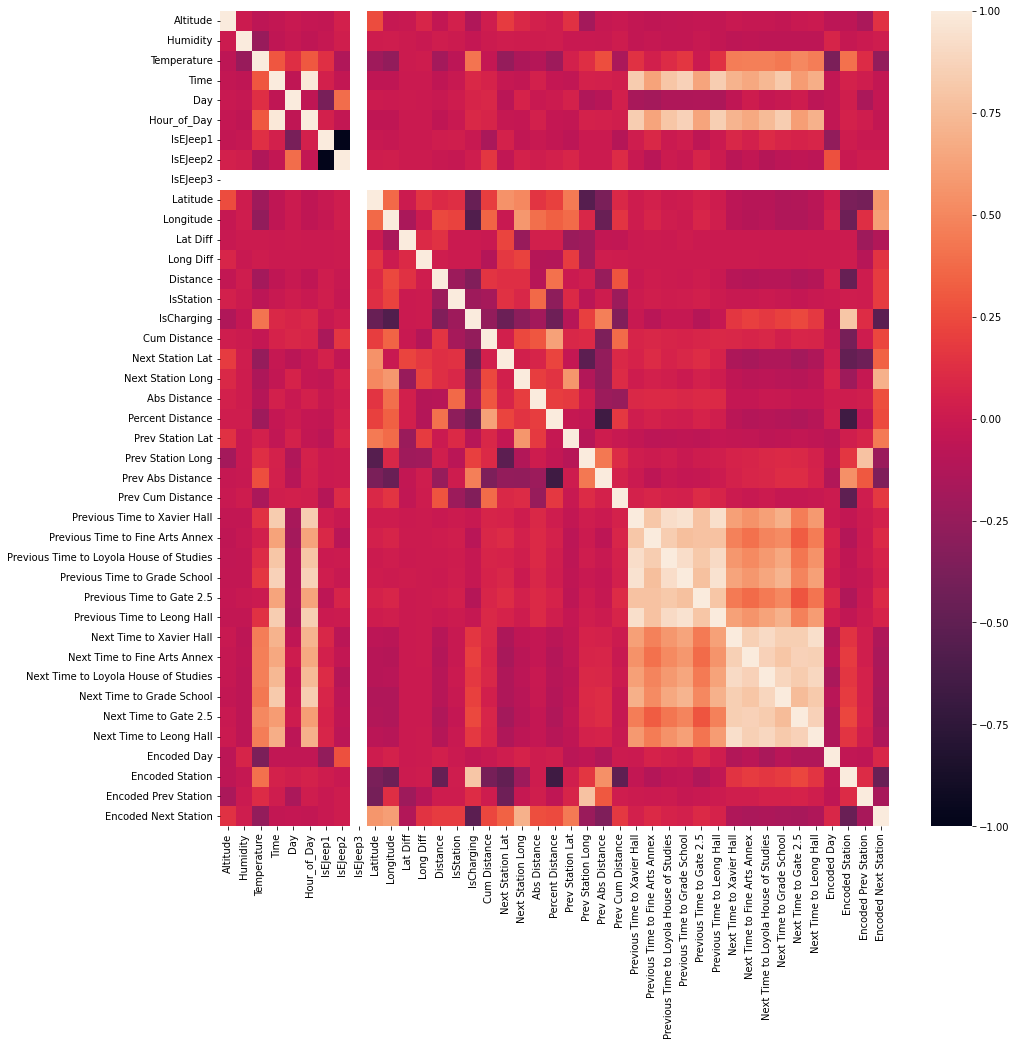

In [ ]:
# Get correlations among features
import seaborn as sns
plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr())

In [ ]:
X = df.copy()
X = X[X['Day'] <= 20]
X.sort_values(by=['Day', 'Time'], axis=0, inplace=True)

In [ ]:
X_train = X[X['Day'] < 16]
X_test = X[X['Day'] >= 16]

# Xs is X but without the next time columns within it
Xs_train = X_train.copy()
Xs_test = X_test.copy()

Xs_train = Xs_train.drop(columns=['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall'])
Xs_test = Xs_test.drop(columns=['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall'])

Y_train = X_train.copy()
Y_test = X_test.copy()

Y_train = Y_train[['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall', 'IsEJeep1', 'IsEJeep2', 'IsEJeep3']]
Y_train = Y_train.dropna()

Y_test = Y_test[['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall', 'IsEJeep1', 'IsEJeep2', 'IsEJeep3']]
Y_test = Y_test.dropna()

assert(len(X_train) == len(Y_train))
assert(len(X_test) == len(Y_test))

In [ ]:
X_train

,Altitude,Humidity,Temperature,Time,Day,Hour_of_Day,IsEJeep1,IsEJeep2,IsEJeep3,Latitude,...,Next Time to Xavier Hall,Next Time to Fine Arts Annex,Next Time to Loyola House of Studies,Next Time to Grade School,Next Time to Gate 2.5,Next Time to Leong Hall,Encoded Day,Encoded Station,Encoded Prev Station,Encoded Next Station
248267,48.000000,63.099998,33.0,23040,4.0,16.0,1,0,0,14.636339,...,23915,24046,24345,23261,23478,23777,6,0,7,8
248268,45.300000,63.099998,33.0,23041,4.0,16.0,1,0,0,14.636328,...,23915,24046,24345,23261,23478,23777,6,0,7,8
248269,45.700000,63.099998,33.0,23042,4.0,16.0,1,0,0,14.636309,...,23915,24046,24345,23261,23478,23777,6,0,7,8
248270,44.400000,63.099998,33.0,23043,4.0,16.0,1,0,0,14.636290,...,23915,24046,24345,23261,23478,23777,6,0,7,8
248271,44.800000,63.099998,33.0,23044,4.0,16.0,1,0,0,14.636278,...,23915,24046,24345,23261,23478,23777,6,0,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342734,76.643672,78.900002,25.4,29515,15.0,18.0,0,1,0,14.639119,...,9678,10349,9765,10686,10789,9405,5,0,2,7
342735,76.643520,78.900002,25.4,29516,15.0,18.0,0,1,0,14.639119,...,9678,10349,9765,10686,10789,9405,5,0,2,7
342736,76.643368,78.900002,25.4,29517,15.0,18.0,0,1,0,14.639119,...,9678,10349,9765,10686,10789,9405,5,0,2,7
342737,76.643216,78.900002,25.4,29518,15.0,18.0,0,1,0,14.639119,...,9678,10349,9765,10686,10789,9405,5,0,2,7


In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

model_s_lr = LinearRegression()
model_s_lr.fit(Xs_train, Y_train)

LinearRegression()

In [61]:
X_test

,Altitude,Humidity,Temperature,Time,Day,Hour_of_Day,IsEJeep1,IsEJeep2,IsEJeep3,Latitude,...,Next Time to Xavier Hall,Next Time to Fine Arts Annex,Next Time to Loyola House of Studies,Next Time to Grade School,Next Time to Gate 2.5,Next Time to Leong Hall,Encoded Day,Encoded Station,Encoded Prev Station,Encoded Next Station
44193,45.7,72.900002,30.200001,9492,16.0,6.0,1,0,0,14.634764,...,9831,10050,10183,10240,10545,9663,3,1,10,2
44194,44.7,72.900002,30.200001,9493,16.0,6.0,1,0,0,14.634763,...,9831,10050,10183,10240,10545,10724,3,1,10,2
44195,44.2,72.900002,30.200001,9494,16.0,6.0,1,0,0,14.634764,...,9831,10050,10183,10240,10545,10724,3,1,10,2
44196,44.3,72.800003,30.200001,9495,16.0,6.0,1,0,0,14.634761,...,9831,10050,10183,10240,10545,10724,3,1,10,2
44197,45.4,72.800003,30.200001,9496,16.0,6.0,1,0,0,14.634760,...,9831,10050,10183,10240,10545,10724,3,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44112,40.6,49.599998,32.400002,28075,17.0,17.0,1,0,0,14.635532,...,9831,10050,10183,10240,10545,9663,2,10,7,1
44113,40.7,49.599998,32.400002,28076,17.0,17.0,1,0,0,14.635532,...,9831,10050,10183,10240,10545,9663,2,10,7,1
44114,41.0,49.599998,32.400002,28077,17.0,17.0,1,0,0,14.635531,...,9831,10050,10183,10240,10545,9663,2,10,7,1
44115,41.4,49.599998,32.400002,28078,17.0,17.0,1,0,0,14.635530,...,9831,10050,10183,10240,10545,9663,2,10,7,1


In [50]:
df_output = pd.DataFrame(columns=Y_train.columns)
df_s_output = pd.DataFrame(columns=Y_train.columns)

In [ ]:
def daytimestamp_to_time(val: int) -> str:
    h = val // (24 * 60)
    m_s = val % (24 * 60)
    m = m_s // 60
    s = m_s % 60

    return f'{h:02}:{m:02}:{s:02}'

In [53]:
for index, row in X_test.iterrows():
    y_hat = model_lr.predict(row.to_frame().transpose())
    df_output.loc[len(df_output)] = y_hat[0]

df_output

,Next Time to Fine Arts Annex,Next Time to Loyola House of Studies,Next Time to Grade School,Next Time to Gate 2.5,Next Time to Leong Hall,Next Time to Xavier Hall,IsEJeep1,IsEJeep2,IsEJeep3
0,10050.0,10183.0,10240.0,10545.0,9663.0,9831.0,1.0,2.997602e-14,0.0
1,10050.0,10183.0,10240.0,10545.0,9663.0,9831.0,1.0,2.997602e-14,0.0
2,10050.0,10183.0,10240.0,10545.0,10724.0,9831.0,1.0,6.911138e-14,0.0
3,10050.0,10183.0,10240.0,10545.0,10724.0,9831.0,1.0,7.488454e-14,0.0
4,10050.0,10183.0,10240.0,10545.0,10724.0,9831.0,1.0,1.235123e-13,0.0
...,...,...,...,...,...,...,...,...,...
169374,10050.0,10183.0,10240.0,10545.0,9663.0,9831.0,1.0,5.393463e-13,0.0
169375,10050.0,10183.0,10240.0,10545.0,9663.0,9831.0,1.0,5.369594e-13,0.0
169376,10050.0,10183.0,10240.0,10545.0,9663.0,9831.0,1.0,5.357381e-13,0.0
169377,10050.0,10183.0,10240.0,10545.0,9663.0,9831.0,1.0,5.380696e-13,0.0


In [57]:
df_s_output = pd.DataFrame(columns=Y_train.columns)

for index, row in Xs_test.iterrows():
    y_hat = model_s_lr.predict(row.to_frame().transpose())
    df_s_output.loc[len(df_s_output)] = y_hat[0]

df_s_output

,Next Time to Fine Arts Annex,Next Time to Loyola House of Studies,Next Time to Grade School,Next Time to Gate 2.5,Next Time to Leong Hall,Next Time to Xavier Hall,IsEJeep1,IsEJeep2,IsEJeep3
0,15804.627240,14310.583288,13229.588647,14812.980639,13495.072826,13662.496931,1.0,1.818545e-13,0.0
1,15809.997869,14314.298968,13235.569320,14809.069457,13496.125577,13661.703426,1.0,1.818545e-13,0.0
2,15783.525225,14292.312513,13220.000617,14785.014242,13470.750253,13642.304660,1.0,1.819656e-13,0.0
3,15493.987952,13965.442000,13102.005577,14751.130212,13342.368874,13412.931552,1.0,2.735590e-13,0.0
4,15508.818306,13980.279464,13112.565255,14770.735448,13361.838176,13429.783607,1.0,2.726708e-13,0.0
...,...,...,...,...,...,...,...,...,...
169373,26049.379968,25586.122182,26581.610376,24433.492970,23981.270750,23611.570458,1.0,3.730349e-14,0.0
169374,26056.027075,25590.001564,26582.135968,24438.865218,23986.916302,23616.096526,1.0,3.719247e-14,0.0
169375,26063.810624,25597.744174,26589.372756,24447.609345,23995.378337,23622.354792,1.0,3.719247e-14,0.0
169376,26065.545033,25601.084372,26593.245195,24452.391650,23999.374235,23625.646521,1.0,3.719247e-14,0.0


In [58]:
df_output.to_csv('Linear Reg Output.csv')
df_s_output.to_csv('Linear Reg Spec Output.csv')

In [59]:
Y_test = Y_test.dropna()
df_output = df_output.dropna()
df_s_output = df_s_output.dropna()

Y_test = Y_test.drop(columns=['IsEJeep1', 'IsEJeep2', 'IsEJeep3'])
df_output = df_output.drop(columns=['IsEJeep1', 'IsEJeep2', 'IsEJeep3'])
df_s_output = df_s_output.drop(columns=['IsEJeep1', 'IsEJeep2', 'IsEJeep3'])



In [72]:
# Calculating MSE for all columns
rmse = mean_squared_error(Y_test, df_output[:len(df_output) - 1], squared=False)
rmse_s = mean_squared_error(Y_test, df_s_output[:len(df_output) - 1], squared=False)

mae = mean_absolute_error(Y_test, df_output[:len(df_output) - 1])
mae_s = mean_absolute_error(Y_test, df_s_output[:len(df_output) - 1])

r2 = r2_score(Y_test, df_output[:len(df_output) - 1])
r2_s = r2_score(Y_test, df_s_output[:len(df_output) - 1])

print('With Next Time of Arrival in Train Dataset:')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'MAE: {mae}')

print('WithOUT Next Time of Arrival in Train Dataset:')
print(f'RMSE: {rmse_s}')
print(f'R^2: {r2_s}')
print(f'MAE: {mae_s}')

With Next Time of Arrival in Train Dataset:
RMSE: 3029.3409069685817
R^2: 0.654379233473608
MAE: 1694.9244072886786
WithOUT Next Time of Arrival in Train Dataset:
RMSE: 4585.632030100113
R^2: 0.21994031613780987
MAE: 3301.9213047138796


In [ ]:
# Do some plotting here

# RQ2: PCA and Feature Importance

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
from sklearn import model_selection

pca = PCA()
X_reduced = pca.fit_transform(minmax_scale(X))

reg = LinearRegression()
scores = []

score = -1 * model_selection.cross_val_score(reg, np.ones((len(X_reduced),1)), )
scores.append(score)


#### Feature Importance

In [85]:
# Feature Importance
coeffs = model_lr.coef_
coeffs_s = model_s_lr.coef_

columns = X_train.columns
columns_s = Xs_train.columns

coeffs = coeffs.transpose()
coeffs_s = coeffs_s.transpose()

imp_dict = dict()
imp_dict_s = dict()

for i, col in enumerate(columns):
    imp_dict[col] = sum(coeffs[i][:5]) / 6

for i, col in enumerate(columns_s):
    imp_dict_s[col] = sum(coeffs_s[i][:5]) / 6

imp_dict = sorted(imp_dict.items(), key=lambda x:x[1])
imp_dict_s = sorted(imp_dict_s.items(), key=lambda x:x[1])

In [87]:
imp_dict_s

[('Lat Diff', -2918503.381508186),
 ('Prev Station Lat', -195411.56579996008),
 ('Next Station Lat', -134563.7832679942),
 ('Longitude', -203.92806484448133),
 ('Encoded Prev Station', -163.05548540480137),
 ('IsEJeep2', -160.57969831462142),
 ('Encoded Next Station', -115.68292038669153),
 ('IsCharging', -101.71865109705448),
 ('Encoded Day', -84.35494116195427),
 ('Encoded Station', -40.119067212471144),
 ('Percent Distance', -4.621279538640126),
 ('Prev Abs Distance', -2.4768052544118597),
 ('Cum Distance', -1.920484170132222),
 ('Prev Cum Distance', -0.3006481385482539),
 ('Previous Time to Loyola House of Studies', -0.07232213474322229),
 ('Previous Time to Gate 2.5', -0.026077420177935254),
 ('IsEJeep3', 0.000440950902046211),
 ('Previous Time to Xavier Hall', 0.04406524987053812),
 ('Previous Time to Grade School', 0.04767586482457912),
 ('Previous Time to Fine Arts Annex', 0.06739936722715782),
 ('Previous Time to Leong Hall', 0.07606009397117382),
 ('Time', 0.09094155841490759

In [101]:
X_train_feat_imp = X_train.copy()
Xs_train_feat_imp = Xs_train.copy()
Y_train_feat_imp = Y_train.copy()

X_test_feat_imp = X_test.copy()
Xs_test_feat_imp = Xs_test.copy()
Y_test_feat_imp = Y_test.copy()


In [102]:
Y_train_feat_imp = Y_train_feat_imp.drop(columns=['IsEJeep1', 'IsEJeep2', 'IsEJeep3'])

In [103]:
# Drop the 3 lowest features according to the coefficients, retrain model, then get RMSE
feat_imp_metrics = []
feat_imp_metrics_s = []

while len(imp_dict) > 0:
    to_drop = imp_dict[:3]

    to_drop = [col for col, val in to_drop]
    X_train_feat_imp = X_train_feat_imp.drop(columns=to_drop)
    X_test_feat_imp = X_test_feat_imp.drop(columns=to_drop)

    new_model = LinearRegression()
    new_model.fit(X_train_feat_imp, Y_train_feat_imp)

    df_output = pd.DataFrame(columns=Y_train_feat_imp.columns)

    for index, row in X_test_feat_imp.iterrows():
        y_hat = new_model.predict(row.to_frame().transpose())
        df_output.loc[len(df_output)] = y_hat[0]

    rmse = mean_squared_error(Y_test_feat_imp, df_output[:len(df_output) - 1], squared=False)
    mae = mean_absolute_error(Y_test_feat_imp, df_output[:len(df_output) - 1])
    r2 = r2_score(Y_test_feat_imp, df_output[:len(df_output) - 1])

    feat_imp_metrics.append({
        'Feature Count': len(X_train_feat_imp.columns),
        'Features Dropped': to_drop,
        'RMSE': rmse,
        'MAE': mae,
        'R^2': r2
    })

    imp_dict = imp_dict[3:]

feat_imp_metrics


In [ ]:
feat_imp_metrics_s = []

while len(imp_dict_s) > 0:
    to_drop = imp_dict_s[:3]

    to_drop = [col for col, val in to_drop]
    Xs_train_feat_imp = Xs_train_feat_imp.drop(columns=to_drop)
    Xs_test_feat_imp = Xs_test_feat_imp.drop(columns=to_drop)

    new_model = LinearRegression()
    new_model.fit(Xs_train_feat_imp, Y_train_feat_imp)

    df_output = pd.DataFrame(columns=Y_train_feat_imp.columns)

    for index, row in Xs_test_feat_imp.iterrows():
        y_hat = new_model.predict(row.to_frame().transpose())
        df_output.loc[len(df_output)] = y_hat[0]

    rmse = mean_squared_error(Y_test_feat_imp, df_output[:len(df_output) - 1], squared=False)
    mae = mean_absolute_error(Y_test_feat_imp, df_output[:len(df_output) - 1])
    r2 = r2_score(Y_test_feat_imp, df_output[:len(df_output) - 1])

    feat_imp_metrics_s.append({
        'Feature Count': len(Xs_train_feat_imp.columns),
        'Features Dropped': to_drop,
        'RMSE': rmse,
        'MAE': mae,
        'R^2': r2
    })

    imp_dict = imp_dict[3:]

feat_imp_metrics_s

# RQ3: Autoencoders

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense

In [ ]:
# Setting up train and test data
X_train_ae = X_train.copy()
Xs_train_ae = Xs_train.copy()
Y_train_ae = Y_train.copy()

X_test_ae = X_test.copy()
Xs_test_ae = Xs_test.copy()
Y_test_ae = Y_test.copy()

Y_train_ae = Y_train_ae.drop(columns=['IsEJeep1', 'IsEJeep2', 'IsEJeep3'])

In [ ]:
# Define the autoencoder architecture
input_dim = X_train_ae.shape[1]
input_s_dim = Xs_train_ae.shape[1]

encoding_dim = 2

# Set the encoding dimension
input_layer = keras.layers.Input(shape=(input_dim,))
input_layer_s = keras.layers.Input(shape=(input_s_dim, ))

encoder = keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
encoder_s = keras.layers.Dense(encoding_dim, activation="relu")(input_layer_s)

decoder = keras.layers.Dense(input_dim, activation="sigmoid")(encoder)
decoder_s = keras.layers.Dense(input_s_dim, activation="sigmoid")(encoder_s)

autoencoder = keras.Model(inputs=input_layer, outputs=decoder)
autoencoder_s = keras.Model(inputs=input_layer_s, outputs=decoder_s)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder_s.compile(optimizer='adam', loss='mse')

# Summary of the autoencoder architecture
autoencoder.summary()
autoencoder_s.summary()

In [ ]:
autoencoder.fit(X_train_ae, X_train_ae, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test_ae, X_test_ae))

In [ ]:
autoencoder_s.fit(Xs_train_ae, Xs_train_ae, epochs=100, batch_size=32, shuffle=True, validation_data=(Xs_test_ae, Xs_test_ae))

In [ ]:
# Use encoder part of the autoencoder for feature selection
encoder = keras.Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)
encoder_s = keras.Model(inputs=autoencoder_s.input, outputs=autoencoder_s.layers[1].output)

encoded_features_train = encoder.predict(X_train_ae)
encoded_features_test = encoder.predict(X_test_ae)

encoded_features_train_s = encoder_s.predict(Xs_train_ae)
encoded_features_test_s = encoder_s.predict(Xs_test_ae)

# Display the shape of extracted features
print("Encoded Features Shape (Train):", encoded_features_train.shape)
print("Encoded Features Shape (Test):", encoded_features_test.shape)

print("S Encoded Features Shape (Train):", encoded_features_train_s.shape)
print("S Encoded Features Shape (Test):", encoded_features_test_s.shape)

In [ ]:
# Fit a logistic regression model using the selected features
ae_model = LinearRegression()
ae_model.fit(encoded_features_train, Y_train_ae)

ae_model_s = LinearRegression()
ae_model_s.fit(encoded_features_train_s, Y_train_ae)

# Make predictions on the test set
y_pred = ae_model.predict(encoded_features_test)
ys_pred = ae_model_s.predict(encoded_features_test_s)

# Calculate accuracy
rmse = mean_squared_error(Y_test, y_pred, squared=False)
rmse_s = mean_squared_error(Y_test, ys_pred, squared=False)

mae = mean_absolute_error(Y_test, ys_pred)
mae_s = mean_absolute_error(Y_test, ys_pred)

r2 = r2_score(Y_test, ys_pred)
r2_s = r2_score(Y_test, ys_pred)

print('With Next Time of Arrival in Train Dataset:')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'MAE: {mae}')

print('WithOUT Next Time of Arrival in Train Dataset:')
print(f'RMSE: {rmse_s}')
print(f'R^2: {r2_s}')
print(f'MAE: {mae_s}')

